In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heights.csv')
df.head()

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [3]:
q1, q3 = df.height.quantile([0.25, 0.75])

In [4]:
iqr = q3 - q1

In [5]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [6]:
lower, upper

(3.962500000000001, 7.6625)

In [7]:
df_new = df[(df.height > lower) & (df.height < upper)]
df_new

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


In [8]:
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('./region_wise_sales.xlsx')
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [10]:
df.Region.unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [11]:
df_apac = df[df.Region == 'APAC']
df_europe = df[df.Region == 'Europe']
df_america = df[df.Region == 'America']

In [12]:
def get_lower_upper(df):
    q1, q3 = df.Sales.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

In [13]:
lower, upper = get_lower_upper(df_apac)
lower, upper

(-737.125, 59747.875)

In [14]:
labels = df.Region.unique()

In [15]:
plot_data = [ df['Sales'][df['Region'] == label] for label in labels]

In [18]:
print(plot_data)

[0     36750
1     36995
2     18579
3     37768
4     23956
5     38143
6     29132
7     21961
8     33299
9     37279
10    21388
11    21896
Name: Sales, dtype: int64, 12     9665
13    10297
14    11079
15    13410
16    11229
17    15352
18    13286
19    11470
20    11873
21    23000
22    12215
23    14895
Name: Sales, dtype: int64, 24    30247
25    29284
26    27904
27    23407
28    23716
29    25077
30    33649
31    24560
32    34102
33    28257
34    30691
35    29387
Name: Sales, dtype: int64]


/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_68172/395587026.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=labels, vert=True, patch_artist=True)


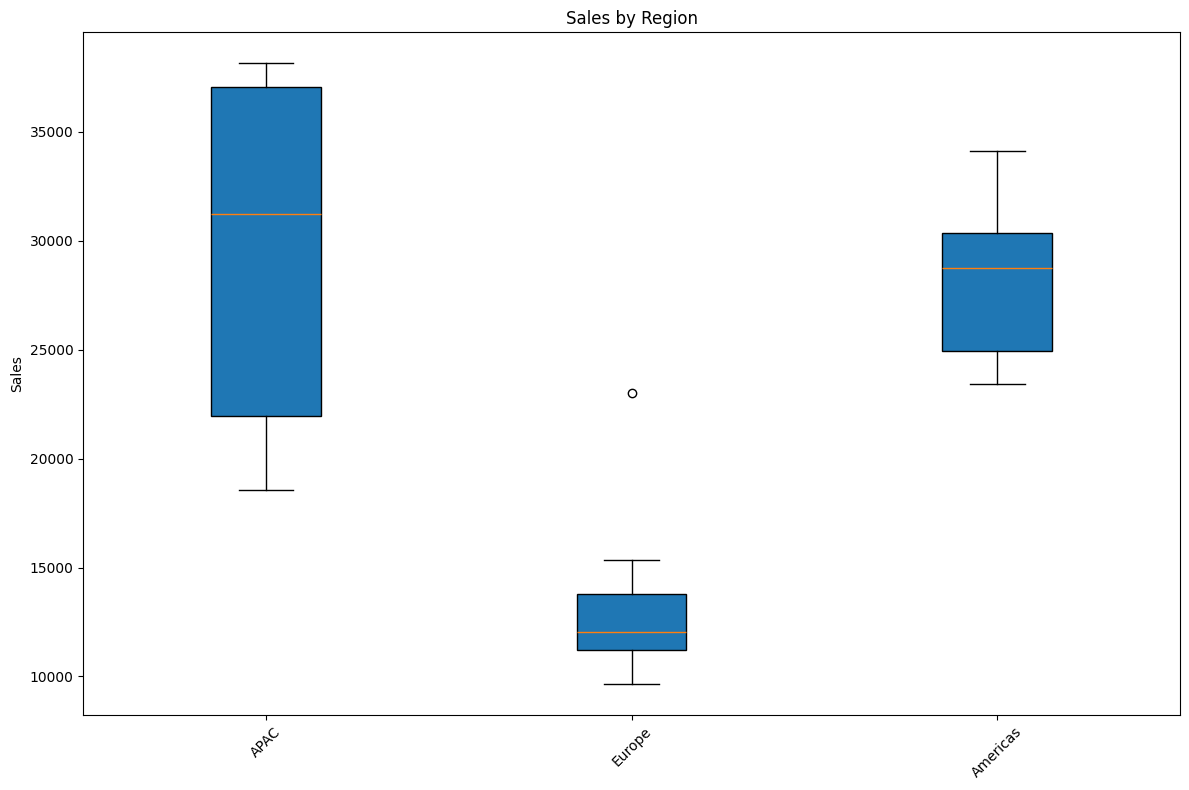

In [17]:
plt.figure(figsize=(12,8))
plt.boxplot(plot_data, labels=labels, vert=True, patch_artist=True)
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()